## **KNN ALGORITHM FULL IMPLEMENTATION WITHOUT SKLEARN LIBRARY**

This is the complete implementation of the K - Nearest Neighbour algorithm using the iris dataset as downloaded from the kaggle website. 

KNN algorithm is a lazy classification algorithm that classifies the test data on the basis of K nearest neighbours. The Program checks for the K nearest neighbours of the test data based on the Eucledian Distance. And out of those K neighbours checks the class with maximum points and assign the test data with the same class.

To do this we first import the essential libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Since, this project is done on Google Colab, we first have to upload the dataset to the colab server as follows.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving datasets_4247_6570_Iris.csv to datasets_4247_6570_Iris (2).csv


Then, we make use of the pandas library to read the csv file and set the index to the column 'Id'!

In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['datasets_4247_6570_Iris.csv'])).set_index('Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


We then perform **Data Wrangling**. We drop any rows with null values if present and then check the shape of the data for future reference.

In [4]:
df.dropna(inplace = True)
df.shape

(150, 5)

Next, to split the data into test and train datasets we make use of the **train_test_split()** function provided by **sklearn.model_selection** package.

We set the test size to be 0.33, i.e., 1/3 rd of the original data.

Then, we also sort the training and testing data on the basis of their 'Id'.

In [5]:
from sklearn.model_selection import train_test_split

dtr, dte = train_test_split(df, test_size = 0.33)

dtr.sort_values('Id', inplace = True)
dte.sort_values('Id', inplace = True)

print(df['Species'].value_counts(),'\n', dtr['Species'].value_counts(),'\n', dte['Species'].value_counts())

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64 
 Iris-versicolor    37
Iris-virginica     35
Iris-setosa        28
Name: Species, dtype: int64 
 Iris-setosa        22
Iris-virginica     15
Iris-versicolor    13
Name: Species, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Now, we define a function **getDistance()**. This function takes a sample from the test data and finds the distance with each of the data in the training column and appends it to a list which is then returned at the end.

In [6]:
def getDistance(a,b):
  d = []
  for i in range(len(a)):
    ss = (((a.iloc[i,0]-b[0])**2)+((a.iloc[i,1]-b[1])**2)+((a.iloc[i,2]-b[2])**2)+((a.iloc[i,3]-b[3])**2))**0.5
    d.append(ss)
  return d

Next, we define a function **getNeighbours()** that calls the **getDistance()** function, and adds the distance array to a new column to the training data. It then siorts the dataframe on the basis of the 'Distance' column and returns the first q rows which are the **'K-Nearest Neighbours'**.

In [7]:
def getNeighbours(a,b,q):
  dist = getDistance(a,b)
  a['Distance'] = dist
  a.sort_values('Distance', inplace = True)
  return a.iloc[:q,:-1]

We also define another function **classification()** to finalize the class of the test data.
We make use of the **idxmax()** function to find the class with maximum occurences.

In [8]:
def classification(a,b,q):
  neigh = getNeighbours(a,b,q)
  return neigh['Species'].value_counts().idxmax()

Finally, we define a function **accuracy()** to calculate the efficiency of our KNN model.

In [9]:
def accuracy(pred, test):
  c = 0
  for i in range(len(pred)):
    if(pred[i]==test.iloc[i]):
      c+=1
  acc = (c/len(pred))*100
  return acc

Now, finally, we take the number of neighbours 'K' as input and then check the classification for all the data in the test data with the train data and print the accuracy of our model in the end.

In [10]:
y_pred = []
k = int(input("Enter the number of nearest neighbors to check with: "))
for i in range(len(dte)):
  y_pred.append(classification(dtr, dte.iloc[i], k))
print("Accuracy Of The KNN model for K = ", k, " is ", accuracy(y_pred, dte.iloc[:,-1]))

Enter the number of nearest neighbors to check with: 8


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Accuracy Of The KNN model for K =  8  is  98.0


Above, we found out that for the model created, we have a **98% accuracy for K = 8** which is pretty good.

Now, we will print the confusion matrix and classification report of our model.

## Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(dte.iloc[:,-1], y_pred)

print(cm)

[[22  0  0]
 [ 0 12  1]
 [ 0  0 15]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


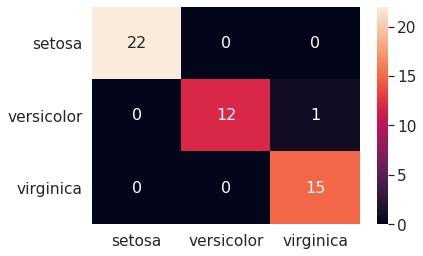

In [12]:
import seaborn as sn

titles = ['setosa', 'versicolor', 'virginica']

df_cm = pd.DataFrame(cm, index = titles, columns = titles)

sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})

plt.show()

## CLASSIFICATION REPORT

In [13]:
print(classification_report(dte.iloc[:,-1],y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.98        50
      macro avg       0.98      0.97      0.98        50
   weighted avg       0.98      0.98      0.98        50



## Thank You!!!